In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from astropy import constants as cn
%matplotlib inline

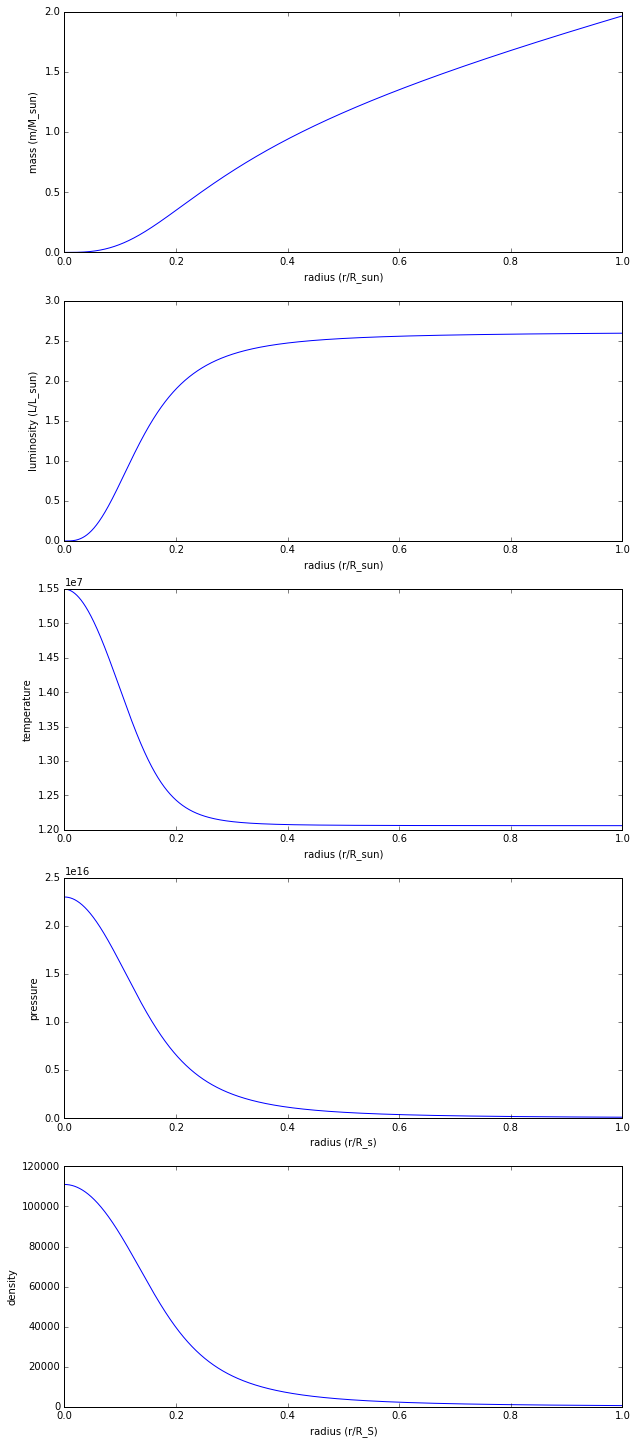

In [69]:
G = cn.G.value
kb = cn.k_B.value
mH = 1.008*cn.u.value
R = kb/mH
a = 7.565*10**(-16)
c = cn.c.value

X=0.7
Y=0.28
Z=0.02
mu = 1.0/(2.0*X +(3.0/4.0)*Y + (1.0/2.0)*Z)

def rho(y,r):
    M_r, L_r, T, P = y
    rhoT= (mu* (P - (1.0/3.0)*a*(T ** 4.0)) ) / (R*T)
    #print rhoT
    return rhoT                                              
                                                    
def ep(y,r):
    M_r, L_r, T, P = y
    rho0 = rho(y,r)
    epT = (1.08*10**(-12.0))*rho0*(0.64**2.0)*((T/(10**6.0))**4.0) + (8.24 * (10** (-31.0)))*rho0*0.64*0.015*((T/(10**6.0))**(19.9))
    return epT                                                
                                            
def kappa(y,r):
    M_r, L_r, T, P = y
    rho0 = rho(y,r)
    k_bf = (4.3*10**21) * (Z/10) * (1+X) * rho0 / (T ** (3.5))
    k_ff = (3.7*10**18)*(1-Z)*(1+X)*rho0/(T**(3.5))
    k_e = 0.02*(1+X)
    k_T = (k_bf+k_ff+k_e)/3.0
    #print k_T
    return k_T

def dM_dr(y,r):
    M_r, L_r, T, P = y
    rho0 = rho(y,r)
    dMr_dr=4.0*np.pi*rho0*(r**2.0)
    return dMr_dr

def dP_dr(y,r):
    M_r, L_r, T, P = y
    rho0 = rho(y,r)
    G = 6.67*10**(-11.0)
    dPr_dr=-G*M_r*rho0/(r**2.0)
    return dPr_dr

def dL_dr(y,r):
    M_r, L_r, T, P = y
    rho0 = rho(y,r)
    ep0 = ep(y,r)
    dLr_dr=4.0*np.pi*rho0*ep0*(r**2.0)
    return dLr_dr

def dT_dr(y,r):
    M_r, L_r, T, P = y
    rho0 = rho(y,r)
    kappa0 = kappa(y,r)
    dTr_dr = -(3.0/(4.0*a*c)) * ((kappa0*rho0)/(T**3.0))*(L_r/(4.0 * np.pi * (r**2.0)))
    return dTr_dr

def f(y, r):
    M_r, L_r, T, P = y
    dMdr = dM_dr(y,r)
    dLdr = dL_dr(y,r)
    dPdr = dP_dr(y,r)
    dTdr = dT_dr(y,r)
    derivs = [dMdr, dLdr, dTdr, dPdr]
    return derivs

R_s = cn.R_sun.value
M_s = cn.M_sun.value
L_s = cn.L_sun.value
M_r0 = 0.0
L_r0 = 0.0
T0 = 15.5*(10**6.0)
P0 = 2.3*(10**16.0)
y0 = [M_r0, L_r0, T0, P0]

r = np.linspace(1, R_s, num = 10000)

psoln = odeint(f, y0, r)

fig = plt.figure(1, figsize=(10,25))
ax1 = fig.add_subplot(511)
ax1.plot(r/R_s, psoln[:, 0]/M_s)
ax1.set_xlabel('radius (r/R_sun)')
ax1.set_ylabel('mass (m/M_sun)')

ax2 = fig.add_subplot(512)
ax2.plot(r/R_s, psoln[:,1]/L_s)
ax2.set_xlabel('radius (r/R_sun)')
ax2.set_ylabel('luminosity (L/L_sun)')

ax3 = fig.add_subplot(513)
ax3.plot(r/R_s, psoln[:,2])
ax3.set_xlabel('radius (r/R_sun)')
ax3.set_ylabel('temperature')

ax4 = fig.add_subplot(514)
ax4.plot(r/R_s, psoln[:,3])
ax4.set_xlabel('radius (r/R_s)')
ax4.set_ylabel('pressure')

M1 = psoln[:, 0]
L1 = psoln[:, 1]
T1 = psoln[:, 2]
P1 = psoln[:, 3]
Y1 = [M1, L1, T1, P1]

ax5 = fig.add_subplot(515)
ax5.plot(r/R_s, rho(Y1,r))
ax5.set_xlabel('radius (r/R_S)')
ax5.set_ylabel('density')

plt.show()